<a href="https://colab.research.google.com/github/Tien84/Face-Detection/blob/master/demolstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy

In [ ]:
!pip install pandas

In [ ]:
!pip install keras

In [ ]:
!pip install matplotlib

In [ ]:
!pip install sklearn

In [ ]:
!pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/driver')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/content/driver/My Drive/LSTM_Model/AAPL.csv')
data= data[::-1] 
data.index.freg='Date'
data

In [ ]:
data.head()

In [ ]:
data.head(), data.tail()

In [30]:
open_price = data.iloc[:,1:2]
train_set = open_price[:1816].values
test_set = open_price[1816:].values
print("Train size: ",train_set.shape)
print("Test size:",test_set.shape)

Train size:  (1816, 1)
Test size: (202, 1)


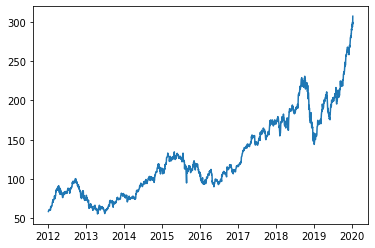

In [31]:
dates = pd.to_datetime(data['Date'])
plt.plot_date(dates,open_price,fmt='-')
plt.savefig("Bitcoin.jpg")

In [32]:
len(data)

2018

In [33]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [35]:
def get_data(train,test,time_step,num_predict,date):
  x_train= list()
  y_train = list()
  x_test = list()
  y_test = list()
  date_test= list()

  for i in range(0,len(train) - time_step - num_predict):
    x_train.append(train[i:i+time_step])
    y_train.append(train[i+time_step:i+time_step+num_predict])

  for i in range(0, len(test) - time_step - num_predict):
    x_test.append(test[i:i+time_step])
    y_test.append(test[i+time_step:i+time_step+num_predict])
    date_test.append(date[i+time_step:i+time_step+num_predict])
  
  return np.asarray(x_train), np.asarray(y_train), np.asarray(x_test), np.asarray(y_test), np.asarray(date_test)

In [36]:
from sklearn.preprocessing import MinMaxScaler
x_train, y_train, x_test, y_test, date_test = get_data(train_set,test_set,30,1, dates)

# dua ve 0->1 cho tap train
scaler = MinMaxScaler()
x_train = x_train.reshape(-1,30)
y_train = x_train.reshape(-1,1)

x_train = scaler.fit_transform(train_set)
y_train = scaler.fit_transform(train_set)

# dua ve 0->1 cho tap test
#x_test = x_test.reshape(-1,30)
x_test = x_test.reshape(-1)
y_test = y_test.reshape(-1,1)

x_test = scaler.fit_transform(test_set)
y_test = scaler.fit_transform(test_set)

date_test = date_test.reshape(-1,1)

In [38]:
from keras import Sequential
from keras.layers import LSTM
from keras.layers import Dropout,Dense
#dau vao 30 doan 1
n_input = 202
n_features = 1

model = Sequential()
model.add(LSTM(units=50,activation='relu', input_shape=(n_input, n_features), return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=50))
model.add(Dropout(0.3))
model.add(Dense(1))


In [39]:
model.compile(optimizer='adam', loss='mse')

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 202, 50)           10400     
                                                                 
 dropout_6 (Dropout)         (None, 202, 50)           0         
                                                                 
 lstm_7 (LSTM)               (None, 202, 50)           20200     
                                                                 
 dropout_7 (Dropout)         (None, 202, 50)           0         
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [41]:
model.fit(x_train, y_train, epochs=20, validation_split=0.2, verbose=1, batch_size=30)
model.save('/content/driver/My Drive/LSTM_Model/lstm_test')

Epoch 1/20
49/49 [==============================] - 7s 28ms/step - loss: 0.0969 - val_loss: 0.0717
Epoch 2/20
49/49 [==============================] - 0s 7ms/step - loss: 0.0274 - val_loss: 0.0676
Epoch 3/20
49/49 [==============================] - 0s 7ms/step - loss: 0.0172 - val_loss: 0.0354
Epoch 4/20
49/49 [==============================] - 0s 7ms/step - loss: 0.0081 - val_loss: 0.0115
Epoch 5/20
49/49 [==============================] - 0s 7ms/step - loss: 0.0059 - val_loss: 0.0131
Epoch 6/20
49/49 [==============================] - 0s 8ms/step - loss: 0.0049 - val_loss: 0.0129
Epoch 7/20
49/49 [==============================] - 0s 9ms/step - loss: 0.0049 - val_loss: 0.0177
Epoch 8/20
49/49 [==============================] - 0s 8ms/step - loss: 0.0047 - val_loss: 0.0196
Epoch 9/20
49/49 [==============================] - 0s 7ms/step - loss: 0.0042 - val_loss: 0.0169
Epoch 10/20
49/49 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0173
Epoch 11/20
49/49 

INFO:tensorflow:Assets written to: /content/driver/My Drive/LSTM_Model/lstm_test/assets


INFO:tensorflow:Assets written to: /content/driver/My Drive/LSTM_Model/lstm_test/assets


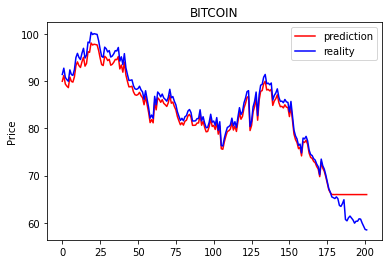

In [45]:
import matplotlib.pyplot as plt
import keras
model = keras.models.load_model('/content/driver/My Drive/LSTM_Model/lstm_test')

test_output = model.predict(x_test)

# print(test_output)
test_1 = scaler.inverse_transform(test_output)
test_2 = scaler.inverse_transform(y_test)
plt.plot(test_1[:202], color='r')
plt.plot(test_2[:202] ,color='b')
plt.title("BITCOIN")
#plt.xlabel("STT")
plt.ylabel("Price")
plt.legend(('prediction', 'reality'),loc='upper right')
plt.show()

In [44]:
test_1 = scaler.inverse_transform(test_output)
test_2 = scaler.inverse_transform(y_test)
print(test_1)
print(test_2)

[[89.983475]
 [91.215126]
 [89.401405]
 [88.95677 ]
 [88.638435]
 [90.87919 ]
 [89.95155 ]
 [89.802505]
 [90.912285]
 [93.278175]
 [94.09132 ]
 [93.29644 ]
 [92.9072  ]
 [94.12375 ]
 [95.060844]
 [93.18552 ]
 [93.75101 ]
 [96.24663 ]
 [96.10749 ]
 [98.0891  ]
 [97.66287 ]
 [97.824005]
 [97.7548  ]
 [97.68302 ]
 [96.49768 ]
 [94.88168 ]
 [93.51934 ]
 [93.3134  ]
 [95.27962 ]
 [94.97065 ]
 [94.3609  ]
 [94.628654]
 [93.38121 ]
 [93.57404 ]
 [94.01216 ]
 [94.60927 ]
 [94.551094]
 [95.22045 ]
 [92.59431 ]
 [93.42554 ]
 [91.90482 ]
 [94.03812 ]
 [91.31024 ]
 [89.983475]
 [88.80034 ]
 [88.823074]
 [88.91667 ]
 [87.748   ]
 [87.13329 ]
 [87.01746 ]
 [87.179085]
 [87.64319 ]
 [86.91775 ]
 [86.49831 ]
 [85.01014 ]
 [86.7452  ]
 [85.01556 ]
 [83.37973 ]
 [81.227585]
 [81.855705]
 [81.1825  ]
 [85.61975 ]
 [83.923904]
 [86.49291 ]
 [86.13097 ]
 [85.51958 ]
 [86.07961 ]
 [85.30832 ]
 [85.00878 ]
 [84.64795 ]
 [85.43427 ]
 [87.037674]
 [85.32999 ]
 [85.585915]
 [84.63573 ]
 [83.923904]
 [82.52553 ]